# Get datasets

In [1]:
# import main libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
# Find correct folder to use - /Users/shim/Desktop/AI/CovidbyGovt
%pwd

'/Users/shim/Desktop/AI/CovidbyGovt/analysis2'

## Import Covid-19 global data

In [3]:
# direct link to John Hopkins global timeset data 
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

covid = pd.read_csv(data, sep=",")

# preview our data
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6,7,7,11,14,14,15,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,17,20,20,21,22,22,23,23,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,105,130,152,173,193,205,235,256,275,293
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,16,17,18,21,22,23,25,26,26,29
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
covid.shape

(264, 86)

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 86 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

## Quick analysis of data

In [6]:
today = datetime.now()

# if time is after 5pm (Tucson time), then use today's date 
today5pm = today.replace(hour=17, minute=1, second=0, microsecond=0)
if today > today5pm:
    date = today  

# otherwise use yesterday's date
else:
    date = today - timedelta(1)

# date in string format
date = date.strftime('%D').lstrip("0").replace(" 0", " ")
date = date.replace("/0", "/")
date

'4/12/20'

In [7]:
# get death total
covid[[date]].sum()

4/12/20    114091
dtype: int64

In [8]:
# get US death counts
covid[date][covid["Country/Region"]=='US'].sum()

22020

## Visualize data

In [9]:
# rename columns
# get by country totals 
country_totals = covid[['Country/Region', date]].copy()
country_totals.rename(columns = {date:"deaths", "Country/Region": "country"}, inplace = True)
country_totals.sort_values(by="deaths", ascending=False).head(20)

,country,deaths
225,US,22020
137,Italy,19899
201,Spain,17209
116,France,14393
223,United Kingdom,10612
133,Iran,4474
23,Belgium,3600
62,China,3219
120,Germany,3022
169,Netherlands,2737


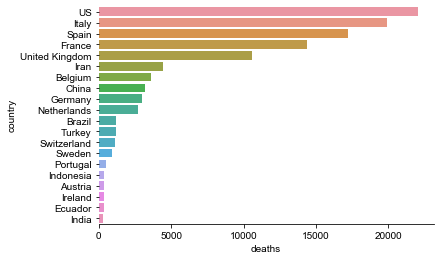

In [10]:
# quick graph 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = country_totals.sort_values(by="deaths", ascending=False).head(20)
g = sns.barplot(x='deaths', y='country', data=data)
sns.despine(left=True)
sns.set_style('white')


### Nicer looking chart, with x-values on y, formatting of values, title

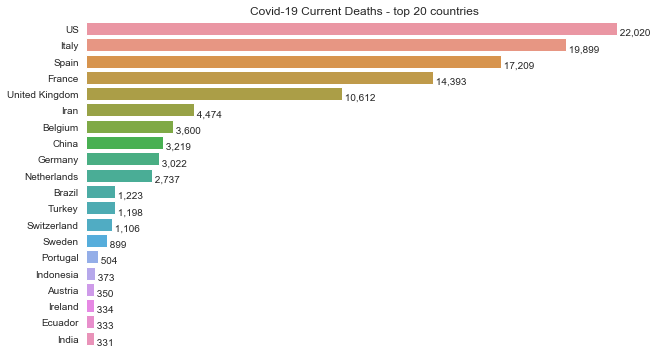

In [11]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# put values on selected data
g = sns.barplot(ax=ax, x='deaths', y='country', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - top 20 countries")

# save graph to a file
g.figure.savefig("top_countries.png")

## Investigate ICU Dataset

In [12]:
# check directory to find 'data' folder in 'CovidbyGovt' folder
%ls

2020-04-11-graphs/            US_deaths_log.png
AZ_counties.png               US_states.png
AZ_timeseries.png             US_states30.png
AZ_timeseries_log.png         US_states_top30.png
ICU-TimeseriesAnalysis.ipynb  WW_deaths.png
ICU.ipynb                     WW_deaths_log.png
Pima_timeseries.png           meeting_saved_chat.txt*
Pima_timeseries_log.png       top_countries.png
US_deaths.png


In [13]:
icu = pd.read_excel('../data/Other/ICU/KHN_ICU_bed_county_analysis_2.xlsx')
icu.head()

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct,60plus_per_each_icu_bed
0,1001,Autauga,AL,Alabama,1,1,6,55036,10523,0.191,1754.0
1,1003,Baldwin,AL,Alabama,3,3,51,203360,53519,0.263,1049.0
2,1005,Barbour,AL,Alabama,1,1,5,26201,6150,0.235,1230.0
3,1007,Bibb,AL,Alabama,1,1,0,22580,4773,0.211,NaN
4,1009,Blount,AL,Alabama,1,1,6,57667,13600,0.236,2267.0


In [14]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cnty_fips                  3142 non-null   int64  
 1   cnty_name                  3142 non-null   object 
 2   st                         3142 non-null   object 
 3   state                      3142 non-null   object 
 4   hospitals_in_cost_reports  3142 non-null   int64  
 5   Hospitals_in_HC            3142 non-null   int64  
 6   all_icu                    3142 non-null   int64  
 7   Total_pop                  3142 non-null   int64  
 8   60plus                     3142 non-null   int64  
 9   60plus_pct                 3142 non-null   float64
 10  60plus_per_each_icu_bed    1477 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 270.1+ KB


In [15]:
icu.isna().sum()

cnty_fips                       0
cnty_name                       0
st                              0
state                           0
hospitals_in_cost_reports       0
Hospitals_in_HC                 0
all_icu                         0
Total_pop                       0
60plus                          0
60plus_pct                      0
60plus_per_each_icu_bed      1665
dtype: int64

In [16]:
# remove column
icu.drop(['60plus_per_each_icu_bed'], axis=1, inplace=True)

In [17]:
# AZ ICU beds by Population
AZ_icu = icu[icu['st'] == 'AZ'].sort_values(by="Total_pop", ascending=False).head(15)
AZ_icu

,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
103,4013,Maricopa,AZ,Arizona,31,34,1004,4155501,808534,0.195
106,4019,Pima,AZ,Arizona,9,9,296,1007257,245814,0.244
107,4021,Pinal,AZ,Arizona,4,4,22,405537,100086,0.247
109,4025,Yavapai,AZ,Arizona,2,2,39,220972,85127,0.385
104,4015,Mohave,AZ,Arizona,4,4,80,204691,73559,0.359
110,4027,Yuma,AZ,Arizona,1,1,42,204281,45739,0.224
98,4005,Coconino,AZ,Arizona,3,3,41,138639,23195,0.167
97,4003,Cochise,AZ,Arizona,4,4,12,126516,35231,0.278
105,4017,Navajo,AZ,Arizona,4,4,12,107902,24267,0.225
96,4001,Apache,AZ,Arizona,4,4,0,71602,14107,0.197


# US by State covid data - merged with ICU data

In [18]:
# direct link to John Hopkins US timeset data 
data2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

covid_US = pd.read_csv(data2, sep=",")

# preview our data
covid_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,4,4,4,4,4,4,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,1,1,1,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,15,18,20,21,23,24,33,39,42,44
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,1,1,1,1,1,1,1,1


In [19]:
covid_US.shape

(3253, 94)

In [20]:
# check US death counts
covid_US[date].sum()

22014

Missing a data point with the global data - because of changing data, I'm not going to worry about this now.

In [21]:
# Find data types
covid_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             3253 non-null   int64  
 1   iso2            3253 non-null   object 
 2   iso3            3253 non-null   object 
 3   code3           3253 non-null   int64  
 4   FIPS            3251 non-null   float64
 5   Admin2          3246 non-null   object 
 6   Province_State  3253 non-null   object 
 7   Country_Region  3253 non-null   object 
 8   Lat             3253 non-null   float64
 9   Long_           3253 non-null   float64
 10  Combined_Key    3253 non-null   object 
 11  Population      3253 non-null   int64  
 12  1/22/20         3253 non-null   int64  
 13  1/23/20         3253 non-null   int64  
 14  1/24/20         3253 non-null   int64  
 15  1/25/20         3253 non-null   int64  
 16  1/26/20         3253 non-null   int64  
 17  1/27/20         3253 non-null   i

In [22]:
# merge icu with Covid_US deaths - outer join to collect all deaths (some deaths may not be isolated to county level)
left = covid_US
right = icu
county_deaths = pd.merge(left, right, 
              how='outer', on=None, 
              left_on="FIPS", right_on="cnty_fips")
county_deaths

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Investigate missing data

In [23]:
# check US death counts
county_deaths[date].sum()

22014

In [24]:
# check counts
county_deaths.isna().sum()

UID                  0
iso2                 0
iso3                 0
code3                0
FIPS                 2
                  ... 
Hospitals_in_HC    111
all_icu            111
Total_pop          111
60plus             111
60plus_pct         111
Length: 104, dtype: int64

In [25]:
# check counts by investigating missing information
county_deaths[county_deaths['all_icu'].isna()].head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,84080001,US,USA,840,80001.0,Out of AL,Alabama,US,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,84080002,US,USA,840,80002.0,Out of AK,Alaska,US,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3151,84080004,US,USA,840,80004.0,Out of AZ,Arizona,US,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# tally deaths from missing counties
missing = county_deaths[county_deaths['all_icu'].isna()]
missing[date].sum()

352

In [27]:
# show a subset of missing data to investigate
missing.sort_values(by=date, ascending=False).head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
3247,84090051,US,USA,840,90051.0,Unassigned,Virginia,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3240,84090044,US,USA,840,90044.0,Unassigned,Rhode Island,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3233,84090036,US,USA,840,90036.0,Unassigned,New York,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,84090021,US,USA,840,90021.0,Unassigned,Kentucky,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3203,84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3230,84090033,US,USA,840,90033.0,Unassigned,New Hampshire,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3223,84090026,US,USA,840,90026.0,Unassigned,Michigan,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,84090025,US,USA,840,90025.0,Unassigned,Massachusetts,US,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.0997,-94.5786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing will be sorted in the future...so, will keep them in the database

In [28]:
# investigate remaining data in county dataframe
county_deaths.sort_values(by=date, ascending=False).head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
1863,84036061,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,...,36061.0,New York,NY,New York,12.0,12.0,761.0,1653877.0,344283.0,0.208
1862,84036059,US,USA,840,36059.0,Nassau,New York,US,40.740665,-73.589419,...,36059.0,Nassau,NY,New York,10.0,10.0,461.0,1363069.0,318040.0,0.233
1317,84026163,US,USA,840,26163.0,Wayne,Michigan,US,42.280984,-83.281255,...,26163.0,Wayne,MI,Michigan,14.0,14.0,586.0,1763822.0,362535.0,0.206
1884,84036103,US,USA,840,36103.0,Suffolk,New York,US,40.883201,-72.801217,...,36103.0,Suffolk,NY,New York,10.0,10.0,281.0,1497595.0,326104.0,0.218
1892,84036119,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,...,36119.0,Westchester,NY,New York,9.0,9.0,179.0,975321.0,214443.0,0.220
615,84017031,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,...,17031.0,Cook,IL,Illinois,46.0,46.0,1606.0,5238541.0,1005046.0,0.192
1780,84034003,US,USA,840,34003.0,Bergen,New Jersey,US,40.960109,-74.071643,...,34003.0,Bergen,NJ,New Jersey,6.0,6.0,147.0,937920.0,211672.0,0.226
1785,84034013,US,USA,840,34013.0,Essex,New Jersey,US,40.786813,-74.246580,...,34013.0,Essex,NJ,New Jersey,7.0,7.0,267.0,800401.0,146732.0,0.183
1298,84026125,US,USA,840,26125.0,Oakland,Michigan,US,42.660901,-83.385954,...,26125.0,Oakland,MI,Michigan,12.0,12.0,409.0,1241860.0,273867.0,0.221
2974,84053033,US,USA,840,53033.0,King,Washington,US,47.491379,-121.834613,...,53033.0,King,WA,Washington,16.0,17.0,450.0,2118119.0,386511.0,0.182


In [29]:
# remove columns that are doubled by merge
county_deaths.drop(columns=['cnty_fips','cnty_name','state'])

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,st,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,39,42,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Investigate By County data

In [30]:
# investigate dataset a bit more
county_deaths['Admin2'].value_counts()

Unassigned    51
Washington    31
Jefferson     26
Franklin      25
Lincoln       24
              ..
Issaquena      1
Kalawao        1
Itawamba       1
Shiawassee     1
Guernsey       1
Name: Admin2, Length: 1893, dtype: int64

Hmmm... lot's of 'Unassigned'

In [31]:
county_deaths.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'cnty_fips', 'cnty_name', 'st', 'state', 'hospitals_in_cost_reports',
       'Hospitals_in_HC', 'all_icu', 'Total_pop', '60plus', '60plus_pct'],
      dtype='object', length=104)

In [32]:
# total unassigned counties in 'Admin2'
county_deaths[date][county_deaths['Admin2']=='Unassigned'].sum()

290

Those are some of our missing deaths in the US ...have to keep and hope this is fixed in the future data

# Visualize 
## US State Data

In [33]:
# group the state deaths
states = county_deaths[['Province_State', date]].copy()
states = states.groupby(['Province_State'], sort=False).sum().reset_index()

# show descending
states = states.sort_values(by=date, ascending=False)
states.head()

,Province_State,4/12/20
37,New York,9385
35,New Jersey,2350
27,Michigan,1479
23,Louisiana,840
26,Massachusetts,756


In [34]:
# check total deaths
states[date].sum()

22014

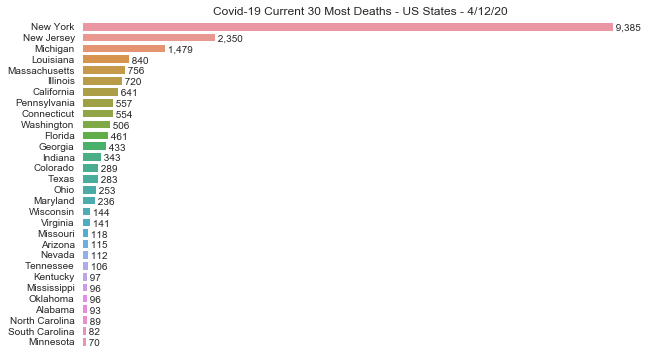

In [35]:
# Graph (CAPS = change info)

# function for setting horizontal labels
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# SET subplot size
fig, ax = plt.subplots(figsize=(10, 6))  

# REPLACE dataset
data = states.head(30)
current_date = str(date)

# plot VALUES on selected data
g = sns.barplot(ax=ax, x=date, y='Province_State', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set TITLE
g.set_title("Covid-19 Current 30 Most Deaths - US States - {}".format(current_date))

# save graph to a FILENAME
g.figure.savefig("US_states30.png")

## Visualize AZ County Deaths

In [36]:
# tally of county deaths
co = county_deaths[['Admin2', 'Province_State', date]].copy()
co.rename(columns = {'Admin2':'county','Province_State':'state',date:'total_deaths'}, inplace = True)
co = co.sort_values(by='total_deaths', ascending=False)
co.head(20)

,county,state,total_deaths
1863,New York,New York,6898
1862,Nassau,New York,846
1317,Wayne,Michigan,704
1884,Suffolk,New York,518
1892,Westchester,New York,511
615,Cook,Illinois,485
1780,Bergen,New Jersey,453
1785,Essex,New Jersey,428
1298,Oakland,Michigan,329
2974,King,Washington,292


In [37]:
# check total deaths
co["total_deaths"].sum()

22014

In [38]:
# check AZ totals by county
AZ_county = co[co['state']=='Arizona']
AZ_county

,county,state,total_deaths
108,Maricopa,Arizona,47
111,Pima,Arizona,29
3203,Unassigned,Arizona,22
103,Coconino,Arizona,15
110,Navajo,Arizona,1
114,Yavapai,Arizona,1
3151,Out of AZ,Arizona,0
113,Santa Cruz,Arizona,0
115,Yuma,Arizona,0
112,Pinal,Arizona,0


Hmmm...Unassigned and Out of AZ need to reassigned ... eventually...for now I'll keep them in the totals

In [39]:
# deaths in AZ
AZ_county['total_deaths'].sum()

115

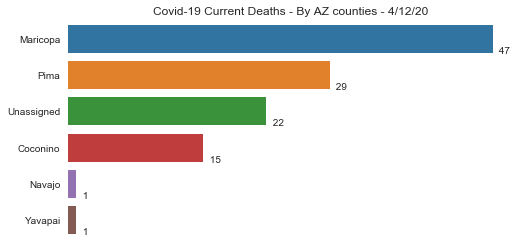

In [40]:
# add values on chart
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                # format values on chart
                ax.text(_x, _y, f"{value:,.0f}", ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                # format values on chart
                ax.text(_x, _y, f" {value:,.0f}", ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# select subplot size
fig, ax = plt.subplots(figsize=(8, 4))  

# put values on selected data
data = AZ_county[AZ_county['total_deaths'] >= 1]
g = sns.barplot(ax=ax, x='total_deaths', y='county', data=data)
show_values_on_bars(g, "h")  

# remove spines
sns.despine(left=True, bottom=True)
sns.set_style('white')

# remove labels.
g.set_ylabel('')    
g.set_xlabel('')

# remove bottom values
g.set(xticks=[])

# set title
g.set_title("Covid-19 Current Deaths - By AZ counties - {}".format(str(date)))

# save graph to a file
g.figure.savefig("AZ_counties.png")

# Timeseries

## Worldwide Timeseries

In [41]:
# look at past month worldwide
covid_ww = covid.iloc[:, 4:].sum(axis=0)
df = covid_ww.tail(30)
df.tail()

4/8/20      88338
4/9/20      95455
4/10/20    102525
4/11/20    108503
4/12/20    114091
dtype: int64

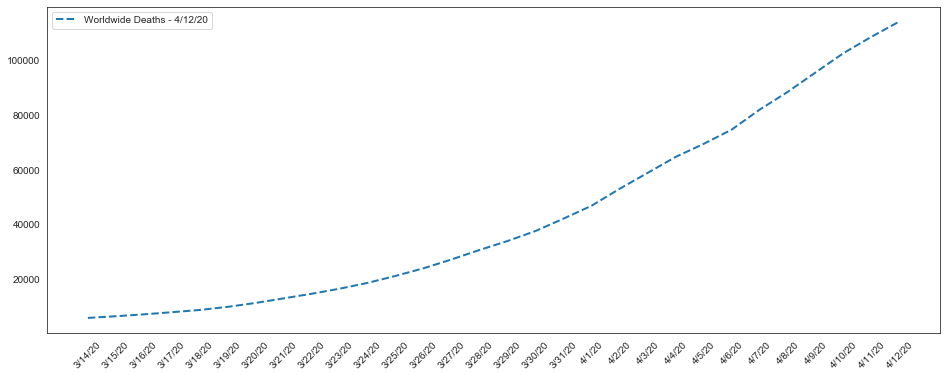

In [42]:
# simple graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Worldwide Deaths - {}'.format(str(date))]) 
plt.show()
# save graph to a file
fig.savefig("WW_deaths.png")

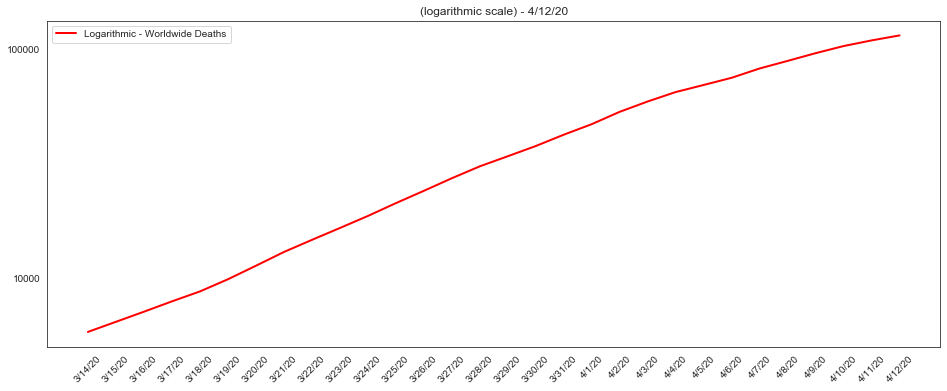

In [43]:
# look at logarithmic growth
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - Worldwide Deaths']) 
plt.title("(logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("WW_deaths_log.png")

## US Timeseries

In [44]:
# Melt dataset - Keep certain columns and change others(?)
covid_ww_long = pd.melt(covid, id_vars=covid.iloc[:, :4],
var_name='Date', value_name='Deaths')
covid_ww_long.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [45]:
covid_ww_long.shape

(21648, 6)

In [46]:
# Countries by date
countries = covid_ww_long.groupby(['Country/Region', 'Date' ], sort=False).sum().reset_index()
countries.drop(['Lat', 'Long'], axis=1, inplace=True)

In [47]:
countries

,Country/Region,Date,Deaths
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
15165,Malawi,4/12/20,2
15166,South Sudan,4/12/20,0
15167,Western Sahara,4/12/20,0
15168,Sao Tome and Principe,4/12/20,0


In [48]:
COUNTRY = 'US'

In [49]:
country = countries[countries['Country/Region' ] == COUNTRY]
country.tail(30)

,Country/Region,Date,Deaths
9776,US,3/14/20,54
9961,US,3/15/20,63
10146,US,3/16/20,85
10331,US,3/17/20,108
10516,US,3/18/20,118
10701,US,3/19/20,200
10886,US,3/20/20,244
11071,US,3/21/20,307
11256,US,3/22/20,417
11441,US,3/23/20,557


In [50]:
# set dataset for graphs
df = country.tail(30)

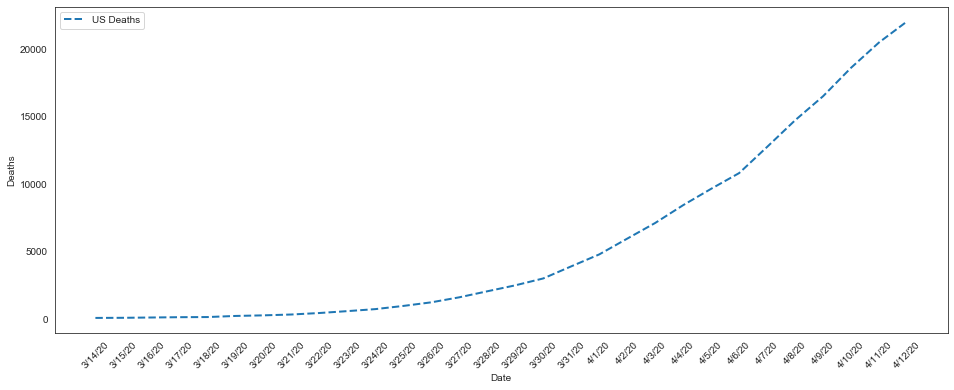

In [51]:
# simple graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df['Date'], y=df['Deaths'], sort=False, linewidth=2)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['US Deaths']) 
plt.show()
# save graph to a file
fig.savefig("US_deaths.png")

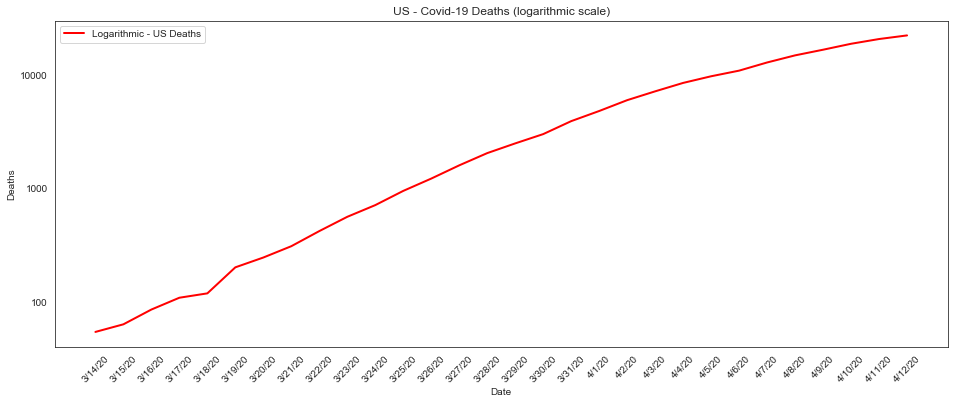

In [52]:
# logarithmic growth
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df['Date'], y=df['Deaths'], sort=False, linewidth=2, color='red')
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - US Deaths']) 
plt.title("US - Covid-19 Deaths (logarithmic scale)")
plt.show()
# save graph to a file
fig.savefig("US_deaths_log.png")

## Arizona timeseries

In [53]:
# AZ Deaths by Date, ICU and Population 
AZ = county_deaths[county_deaths['Province_State']=='Arizona']

In [54]:
# investigate AZ dataset
AZ

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
101,84004001,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,4001.0,Apache,AZ,Arizona,4.0,4.0,0.0,71602.0,14107.0,0.197
102,84004003,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,4003.0,Cochise,AZ,Arizona,4.0,4.0,12.0,126516.0,35231.0,0.278
103,84004005,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,4005.0,Coconino,AZ,Arizona,3.0,3.0,41.0,138639.0,23195.0,0.167
104,84004007,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,4007.0,Gila,AZ,Arizona,3.0,3.0,8.0,53145.0,18752.0,0.353
105,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,4009.0,Graham,AZ,Arizona,1.0,1.0,0.0,37700.0,6933.0,0.184
106,84004011,US,USA,840,4011.0,Greenlee,Arizona,US,33.214988,-109.240528,...,4011.0,Greenlee,AZ,Arizona,0.0,0.0,0.0,9368.0,1631.0,0.174
107,84004012,US,USA,840,4012.0,La Paz,Arizona,US,33.728542,-113.981003,...,4012.0,La Paz,AZ,Arizona,2.0,2.0,3.0,20477.0,9183.0,0.448
108,84004013,US,USA,840,4013.0,Maricopa,Arizona,US,33.348359,-112.491815,...,4013.0,Maricopa,AZ,Arizona,31.0,34.0,1004.0,4155501.0,808534.0,0.195
109,84004015,US,USA,840,4015.0,Mohave,Arizona,US,35.704717,-113.757790,...,4015.0,Mohave,AZ,Arizona,4.0,4.0,80.0,204691.0,73559.0,0.359
110,84004017,US,USA,840,4017.0,Navajo,Arizona,US,35.399771,-110.321898,...,4017.0,Navajo,AZ,Arizona,4.0,4.0,12.0,107902.0,24267.0,0.225


In [55]:
# drop extra columns
drops = ['cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
AZ_dates = AZ.drop(drops, axis=1,inplace=False)
AZ_dates.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20'

In [56]:
# convert dates to index
AZ_dates = AZ_dates.iloc[:, 12:].sum(axis=0)
AZ_dates.tail()

4/8/20      80
4/9/20      89
4/10/20     97
4/11/20    108
4/12/20    115
dtype: int64

In [57]:
# change dataset for start of deaths
df = AZ_dates
df = df[df>0]

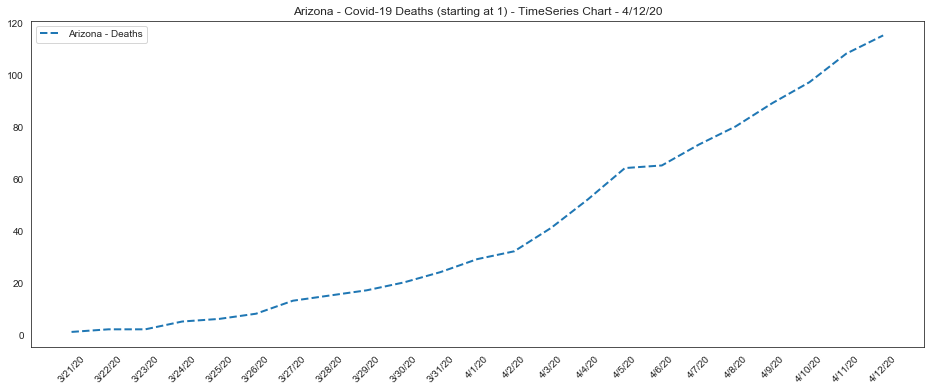

In [58]:
# timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Arizona - Deaths']) 
plt.title("Arizona - Covid-19 Deaths (starting at 1) - TimeSeries Chart - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("AZ_timeseries.png")

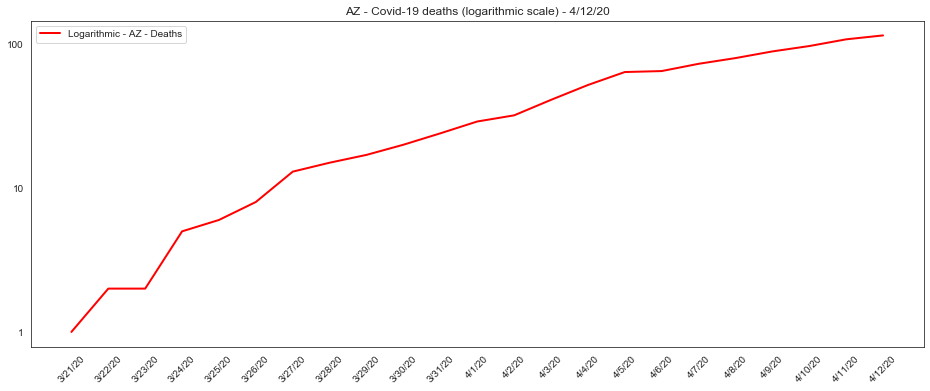

In [59]:
# look at logarithmic timeseries growth
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - AZ - Deaths']) 
plt.title("AZ - Covid-19 deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("AZ_timeseries_log.png")

## Pima County Timeseries

In [60]:
# search for Pima by FIPS#
Pima = AZ[AZ['FIPS']==4019.0]
Pima

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,cnty_fips,cnty_name,st,state,hospitals_in_cost_reports,Hospitals_in_HC,all_icu,Total_pop,60plus,60plus_pct
111,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,-111.789003,...,4019.0,Pima,AZ,Arizona,9.0,9.0,296.0,1007257.0,245814.0,0.244


In [61]:
# drop extra columns
drops = ['cnty_fips','cnty_name','st','state','hospitals_in_cost_reports','Hospitals_in_HC','all_icu','Total_pop','60plus','60plus_pct']
Pima_dates = Pima.drop(drops, axis=1,inplace=False)
Pima_dates.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20'

In [62]:
# convert dates to index
df = Pima_dates.iloc[:, 12:].sum(axis=0)
df.tail()

4/8/20     16
4/9/20     16
4/10/20    16
4/11/20    16
4/12/20    29
dtype: int64

In [63]:
# set dataset for graphs
df=df[df>0]
df

3/24/20     1
3/25/20     1
3/26/20     1
3/27/20     4
3/28/20     4
3/29/20     4
3/30/20     4
3/31/20     4
4/1/20      4
4/2/20     11
4/3/20     11
4/4/20     11
4/5/20     12
4/6/20     13
4/7/20     13
4/8/20     16
4/9/20     16
4/10/20    16
4/11/20    16
4/12/20    29
dtype: int64

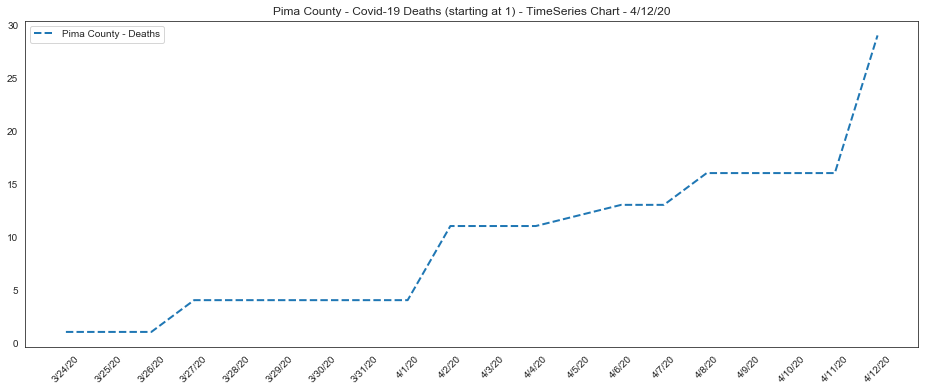

In [64]:
# timeseries graph
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2)
ax.lines[0].set_linestyle("--")
plt.xticks(rotation=45)
ax.legend(['Pima County - Deaths']) 
plt.title("Pima County - Covid-19 Deaths (starting at 1) - TimeSeries Chart - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_timeseries.png")

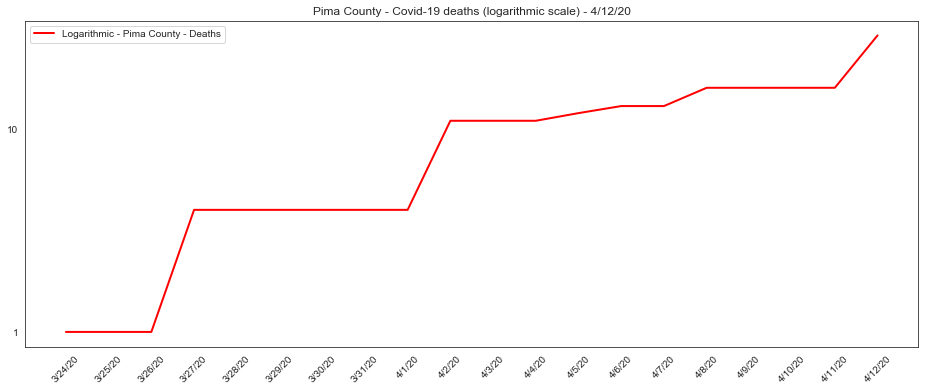

In [65]:
# look at logarithmic timeseries growth
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)) )
sns.lineplot(x=df.index, y=df, sort=False, linewidth=2, color='red')
ax.lines[0].set_linestyle("-")
plt.xticks(rotation=45)
ax.legend(['Logarithmic - Pima County - Deaths']) 
plt.title("Pima County - Covid-19 deaths (logarithmic scale) - {}".format(str(date)))
plt.show()
# save graph to a file
fig.savefig("Pima_timeseries_log.png")

## Summary

As of 4/12/20, Pima County doesn't seem to be experiencing the escalation of the rest of the world, country, or state! 
The home stay started on 3/16/20. Maybe that was enough time to delay the onset?

We will have to look at it with predictions from other countries that got some warning and were able to put measures in place to sop the rate of escalation.

## TO DO:
1. Change data to look at increment per day per country - KEY!!!!!!!!!
2. Look at time-series - # of days vs # of deaths, # of days vs. # of cases
3. Seperate out test cases vs training case
    - US separately is the Test case
    - outlier - South Korea, Singapore, China
    - ROW is the training case
4. Look at 2 plots
    - in deaths 
    - in deaths as a % of pop